In [37]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X = np.linspace(10, 50)
Y = np.linspace(10, 50)

In [32]:
X += np.random.uniform(-4,4,50)
Y +=np.random.uniform(-4,4,50)

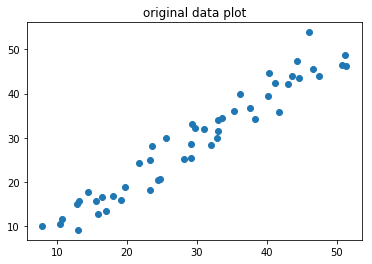

In [39]:
plt.scatter(X,Y)
plt.title("original data plot")
plt.show()

In [33]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [41]:
W = tf.Variable(np.random.randn(), name='W')
b = tf.Variable(np.random.randn(), name='b')

In [42]:
pred = tf.add(tf.multiply(x,W),b)

In [45]:
cost = tf.reduce_sum(tf.pow(tf.subtract(y,pred),2)/(2*len(X)))

In [59]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [60]:
init = tf.global_variables_initializer()

In [63]:
training_epoch = 1000

In [66]:
with tf.Session() as sess:
    sess.run(init)
    for epochs in range(training_epoch):
        for _X,_Y in zip(X,Y):
            sess.run(optimizer, feed_dict={x:_X,y:_Y})
        if (epochs+1) % 50 ==0:
            c = sess.run(cost, feed_dict = {x : X, y : Y}) 
            print("Epoch", (epochs + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
# Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={x: X, y: Y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.763832 W = 1.0342699 b = -0.10940587
Epoch 100 : cost = 5.7659006 W = 1.0341179 b = -0.10209924
Epoch 150 : cost = 5.7678847 W = 1.0339731 b = -0.09513663
Epoch 200 : cost = 5.76978 W = 1.033835 b = -0.088502206
Epoch 250 : cost = 5.771599 W = 1.0337036 b = -0.08218026
Epoch 300 : cost = 5.773332 W = 1.0335782 b = -0.07615605
Epoch 350 : cost = 5.774996 W = 1.0334587 b = -0.070415705
Epoch 400 : cost = 5.776592 W = 1.033345 b = -0.06494569
Epoch 450 : cost = 5.7781105 W = 1.0332365 b = -0.05973349
Epoch 500 : cost = 5.7795663 W = 1.0331331 b = -0.05476674
Epoch 550 : cost = 5.780959 W = 1.0330347 b = -0.05003393
Epoch 600 : cost = 5.782291 W = 1.0329409 b = -0.04552407
Epoch 650 : cost = 5.783564 W = 1.0328515 b = -0.041226853
Epoch 700 : cost = 5.7847757 W = 1.0327662 b = -0.037132002
Epoch 750 : cost = 5.78594 W = 1.032685 b = -0.033230003
Epoch 800 : cost = 5.7870493 W = 1.0326077 b = -0.029511718
Epoch 850 : cost = 5.7881103 W = 1.032534 b = -0.02596872
Epoch 90

In [67]:
print(training_cost)

5.791012


In [81]:
prediction = weight* X + bias
print(prediction)

[13.38917418  8.10761086 13.23090418 16.33239959 10.71208495 11.0016643
 14.90160501 13.60407397 18.51254179 17.52397616 16.00314414 19.69981789
 16.87733533 23.96629719 20.37717363 22.33876093 25.51479811 25.12718424
 23.96054213 30.09830252 24.26210466 26.39061217 28.99188998 30.03416257
 33.88800377 34.10880141 33.04460685 30.65096481 30.14385238 36.41399521
 32.02920221 39.4953286  34.6800316  34.05182688 38.72249092 37.33107065
 43.08299388 44.44530645 44.96777598 46.01664669 41.38235062 41.59613119
 48.95116067 42.50610536 45.64107342 52.27615154 52.81365668 48.09601562
 52.97979277 47.51363003]


In [82]:
print("Training cost:",training_cost,"W",W,"b",b)

Training cost: 5.791012 W Tensor("W_1/read:0", shape=(), dtype=float32) b Tensor("b/read:0", shape=(), dtype=float32)


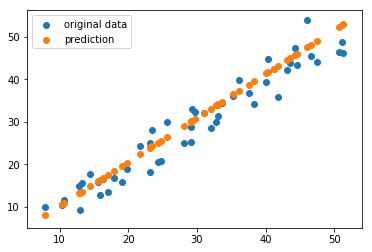

In [88]:
plt.scatter(X,Y,label='original data')
plt.scatter(X,prediction, label='prediction')
plt.legend()
plt.show()